# **Data Analysis Project: E-Commerce Public Dataset**

- **Name:** Muhammad Rizqi Azhari
- **Email:** rizqimrazhari@gmail.com
- **Dicoding ID:** rizqimrazhari

## **Business Questions**

1. Bagaimana perkembangan tren penjualan di Olist?
2. Kategori produk mana yang memiliki penjualan terbanyak?

## **Import Libraries**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## **Data Wrangling**

### **Gathering Data**

In [2]:
customer_df = pd.read_csv("Dataset/customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv("Dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv("Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv("Dataset/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv("Dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv("Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_df = pd.read_csv("Dataset/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
products_df = pd.read_csv("Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
sellers_df = pd.read_csv("Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### **Assessing Data**

In [14]:
# merging dataset
df_all = orders_df.merge(order_items_df, on='order_id', how='left')
df_all = df_all.merge(order_payments_df, on='order_id', how='outer', validate='m:m')
df_all = df_all.merge(order_reviews_df, on='order_id', how='outer')
df_all = df_all.merge(products_df, on='product_id', how='outer')
df_all = df_all.merge(customer_df, on='customer_id', how='outer')
df_all = df_all.merge(sellers_df, on='seller_id', how='outer')

pd.set_option('display.max_columns', None) # mengatur pandas agar menampilkan semua kolom tanpa di truncate
df_all.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,1.0,credit_card,3.0,37.77,b46f1e34512b0f4c74a72398b03ca788,4.0,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,1.0,credit_card,1.0,37.77,dc90f19c2806f1abba9e72ad3c350073,5.0,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP


In [15]:
# melihat ukuran dataframe
df_all.shape

(119143, 39)

In [16]:
# melihat tipe data
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

In [17]:
# melihat null/missing values
df_all.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           997
review_score                        997
review_comment_title             105154
review_comment_message            68898
review_creation_date                997
review_answer_timestamp             997
product_category_name              2542


Dari output kode diatas, dapat dilihat bahwa masih terdapat banyak missing values dalam dataset

In [18]:
# melihat duplikasi
df_all.duplicated().sum()

0

In [19]:
# melihat unique values
df_all.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
price                             5968
freight_value                     6999
payment_sequential                  29
payment_type                         5
payment_installments                24
payment_value                    29077
review_id                        98410
review_score                         5
review_comment_title              4527
review_comment_message           36159
review_creation_date               636
review_answer_timestamp          98248
product_category_name               73
product_name_lenght      

In [20]:
# melihat sebaran statistik
df_all.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
count,119143,119143,119143,119143,118966,117057,115722,119143,118310.000000,118310,118310,118310,118310.000000,118310.000000,119140.000000,119140,119140.000000,119140.000000,118146,118146.000000,13989,50245,118146,118146,116601,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,119143,119143.000000,119143,119143,118310.000000,118310,118310
unique,99441,99441,8,98875,90733,81018,95664,459,NaN,32951,3095,93318,NaN,NaN,NaN,5,NaN,NaN,98410,NaN,4527,36159,636,98248,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96096,NaN,4119,27,NaN,611,23
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,NaN,credit_card,NaN,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-08-17 22:17:55,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,sao paulo,SP
freq,63,63,115723,63,63,63,63,663,NaN,536,2155,63,NaN,NaN,NaN,87776,NaN,NaN,63,NaN,494,259,547,63,11988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,NaN,18875,50265,NaN,29293,84377
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.196543,NaN,NaN,NaN,120.646603,20.032387,1.094737,NaN,2.941246,172.735135,NaN,4.015582,NaN,NaN,NaN,NaN,NaN,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,NaN,35033.451298,NaN,NaN,24442.410413,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.699489,NaN,NaN,NaN,184.109691,15.836850,0.730141,NaN,2.777848,267.776077,NaN,1.400436,NaN,NaN,NaN,NaN,NaN,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,NaN,29823.198969,NaN,NaN,27573.004511,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,1.000000,NaN,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN,1003.000000,NaN,NaN,1001.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,1.000000,NaN,1.000000,60.850000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN,11250.000000,NaN,NaN,6429.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,74.900000,16.280000,1.000000,NaN,2.000000,108.160000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN,24240.000000,NaN,NaN,13660.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,134.900000,21.180000,1.000000,NaN,4.000000,189.240000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN,58475.000000,NaN,NaN,27972.000000,NaN,NaN


### **Cleaning Data**

In [21]:
# menerjemahkan kategori produk ke dalam Bahasa Inggris
category_mapping = {
    'beleza_saude': 'health_beauty',
    'informatica_acessorios': 'computers_accessories',
    'automotivo': 'auto',
    'cama_mesa_banho': 'bed_bath_table',
    'moveis_decoracao': 'furniture_decor',
    'esporte_lazer': 'sports_leisure',
    'perfumaria': 'perfumery',
    'utilidades_domesticas': 'housewares',
    'telefonia': 'telephony',
    'relogios_presentes': 'watches_gifts',
    'alimentos_bebidas': 'food_drink',
    'bebes': 'baby',
    'papelaria': 'stationery',
    'tablets_impressao_imagem': 'tablets_printing_image',
    'brinquedos': 'toys',
    'telefonia_fixa': 'fixed_telephony',
    'ferramentas_jardim': 'garden_tools',
    'fashion_bolsas_e_acessorios': 'fashion_bags_accessories',
    'eletroportateis': 'small_appliances',
    'consoles_games': 'consoles_games',
    'audio': 'audio',
    'fashion_calcados': 'fashion_shoes',
    'cool_stuff': 'cool_stuff',
    'malas_acessorios': 'luggage_accessories',
    'climatizacao': 'air_conditioning',
    'construcao_ferramentas_construcao': 'construction_tools_construction',
    'moveis_cozinha_area_de_servico_jantar_e_jardim': 'kitchen_dining_laundry_garden_furniture',
    'construcao_ferramentas_jardim': 'costruction_tools_garden',
    'fashion_roupa_masculina': 'fashion_male_clothing',
    'pet_shop': 'pet_shop',
    'moveis_escritorio': 'office_furniture',
    'market_place': 'market_place',
    'eletronicos': 'electronics',
    'eletrodomesticos': 'home_appliances',
    'artigos_de_festas': 'party_supplies',
    'casa_conforto': 'home_confort',
    'construcao_ferramentas_ferramentas': 'costruction_tools_tools',
    'agro_industria_e_comercio': 'agro_industry_and_commerce',
    'moveis_colchao_e_estofado': 'furniture_mattress_and_upholstery',
    'livros_tecnicos': 'books_technical',
    'casa_construcao': 'home_construction',
    'instrumentos_musicais': 'musical_instruments',
    'moveis_sala': 'furniture_living_room',
    'construcao_ferramentas_iluminacao': 'construction_tools_lights',
    'industria_comercio_e_negocios': 'industry_commerce_and_business',
    'alimentos': 'food',
    'artes': 'art',
    'moveis_quarto': 'furniture_bedroom',
    'livros_interesse_geral': 'books_general_interest',
    'construcao_ferramentas_seguranca': 'construction_tools_safety',
    'fashion_underwear_e_moda_praia': 'fashion_underwear_beach',
    'fashion_esporte': 'fashion_sport',
    'sinalizacao_e_seguranca': 'signaling_and_security',
    'pcs': 'computers',
    'artigos_de_natal': 'christmas_supplies',
    'fashion_roupa_feminina': 'fashio_female_clothing',
    'eletrodomesticos_2': 'home_appliances_2',
    'livros_importados': 'books_imported',
    'bebidas': 'drinks',
    'cine_foto': 'cine_photo',
    'la_cuisine': 'la_cuisine',
    'musica': 'music',
    'casa_conforto_2': 'home_comfort_2',
    'portateis_casa_forno_e_cafe': 'small_appliances_home_oven_and_coffee',
    'cds_dvds_musicais': 'cds_dvds_musicals',
    'dvds_blu_ray': 'dvds_blu_ray',
    'flores': 'flowers',
    'artes_e_artesanato': 'arts_and_craftmanship',
    'fraldas_higiene': 'diapers_and_hygiene',
    'fashion_roupa_infanto_juvenil': 'fashion_childrens_clothes',
    'seguros_e_servicos': 'security_and_services'
}

df_all['product_category_name'] = df_all['product_category_name'].replace(category_mapping)

df_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,1.0,credit_card,3.0,37.77,b46f1e34512b0f4c74a72398b03ca788,4.0,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,1.0,credit_card,1.0,37.77,dc90f19c2806f1abba9e72ad3c350073,5.0,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,1.0,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,1.0,boleto,1.0,93.13,7f9849fcbfdf9fa3070c05b5501bf066,5.0,NaN,NaN,2018-07-10 00:00:00,2018-07-10 18:32:29,constructi

In [22]:
# drop kolom review_comment_title dan review_comment_message

df_all.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

In [25]:
# drop seluruh baris dengan missing values
df_all = df_all.dropna()

print(df_all.isna().sum())

print("\nDimensi Dataframe setelah dibersihkan", df_all.shape)

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm   

In [28]:
# ubah tipe data seluruh data yang berupa tanggal menjadi datetime

date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_creation_date',
                'review_answer_timestamp']

df_all[date_columns] = df_all[date_columns].apply(pd.to_datetime)

# Cek hasilnya
print(df_all.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_id                                object
review_score                            float64
review_creation_date             datetim

## **Exploratory Data Analysis (EDA)**

### **Explore orders**

In [81]:
# Menghitung jumlah pesanan harian
daily_orders = df_all.groupby(df_all['order_purchase_timestamp'].dt.date).size()
print("Jumlah pesanan harian:")
print(daily_orders)

Jumlah pesanan harian:
order_purchase_timestamp
2016-10-03     8
2016-10-04    69
2016-10-05    50
2016-10-06    47
2016-10-07    44
              ..
2018-08-25    77
2018-08-26    84
2018-08-27    71
2018-08-28    47
2018-08-29    16
Length: 611, dtype: int64


In [86]:
# Menghitung jumlah pesanan bulanan
monthly_orders = df_all.groupby(df_all['order_purchase_timestamp'].dt.to_period('M')).size()
print("\nJumlah pesanan bulanan:")
print(monthly_orders)


Jumlah pesanan bulanan:
order_purchase_timestamp
2016-10     334
2016-12       1
2017-01     955
2017-02    1890
2017-03    3010
2017-04    2625
2017-05    4174
2017-06    3640
2017-07    4666
2017-08    4973
2017-09    4920
2017-10    5382
2017-11    8692
2017-12    6261
2018-01    8146
2018-02    7671
2018-03    8184
2018-04    7987
2018-05    8019
2018-06    7262
2018-07    7124
2018-08    7300
Freq: M, dtype: int64


In [87]:
# Menghitung jumlah pesanan tahunan
yearly_orders = df_all.groupby(df_all['order_purchase_timestamp'].dt.to_period('Y')).size()
print("\nJumlah pesanan tahunan:")
print(yearly_orders)


Jumlah pesanan tahunan:
order_purchase_timestamp
2016      335
2017    51188
2018    61693
Freq: A-DEC, dtype: int64


In [85]:
# Menghitung total penjualan harian berdasarkan harga produk
daily_sales = df_all.groupby(df_all['order_purchase_timestamp'].dt.date)['price'].sum()
print("\nTotal penjualan harian:")
print(daily_sales)


Total penjualan harian:
order_purchase_timestamp
2016-10-03      463.48
2016-10-04     9093.20
2016-10-05     6329.57
2016-10-06     5889.96
2016-10-07     6205.25
                ...   
2018-08-25    10711.93
2018-08-26     8235.71
2018-08-27     5343.67
2018-08-28     3757.51
2018-08-29     1546.04
Name: price, Length: 611, dtype: float64


In [38]:
# Menghitung total penjualan bulanan berdasarkan harga produk
monthly_sales = df_all.groupby(df_all['order_purchase_timestamp'].dt.to_period('M'))['price'].sum()
print("\nTotal penjualan bulanan:")
print(monthly_sales)


Total penjualan bulanan:
order_purchase_timestamp
2016-10      41659.92
2016-12         10.90
2017-01     116505.92
2017-02     234576.40
2017-03     370039.64
2017-04     349985.58
2017-05     516221.98
2017-06     437903.81
2017-07     510081.68
2017-08     572738.71
2017-09     635652.10
2017-10     655969.70
2017-11    1008005.90
2017-12     728074.99
2018-01     934616.32
2018-02     850476.08
2018-03     971126.98
2018-04     994816.77
2018-05    1003273.80
2018-06     895916.69
2018-07     882403.12
2018-08     861115.49
Freq: M, Name: price, dtype: float64


In [39]:
# Menghitung total penjualan tahunan berdasarkan harga produk
yearly_sales = df_all.groupby(df_all['order_purchase_timestamp'].dt.to_period('Y'))['price'].sum()
print("\nTotal penjualan tahunan:")
print(yearly_sales)


Total penjualan tahunan:
order_purchase_timestamp
2016      41670.82
2017    6135756.41
2018    7393745.25
Freq: A-DEC, Name: price, dtype: float64


### **Explore products**

In [48]:
# Menghitung total penjualan untuk setiap kategori produk
category_sales = df_all.groupby('product_category_name')['price'].sum()

# Mengurutkan kategori produk berdasarkan total penjualan secara menurun
category_sales_sorted = category_sales.sort_values(ascending=False)

# Menampilkan kategori produk dengan penjualan terbanyak
top_category = category_sales_sorted.index[0]
total_sales_top_category = category_sales_sorted.iloc[0]

print("Kategori produk dengan penjualan terbanyak adalah:", top_category)
print("Total penjualan untuk kategori produk ini adalah:", total_sales_top_category)


Kategori produk dengan penjualan terbanyak adalah: health_beauty
Total penjualan untuk kategori produk ini adalah: 1267072.48


In [49]:
# Mengambil 5 kategori teratas
top_5_categories = category_sales_sorted.head(5)

print("Total penjualan untuk 5 kategori teratas:")
print(top_5_categories)

Total penjualan untuk 5 kategori teratas:
product_category_name
health_beauty            1267072.48
watches_gifts            1207355.40
bed_bath_table           1081890.33
sports_leisure            989555.18
computers_accessories     922482.79
Name: price, dtype: float64


## **Data Visualization & Explanatory Analysis**

### **Q1. Bagaimana perkembangan tren penjualan di Olist?**

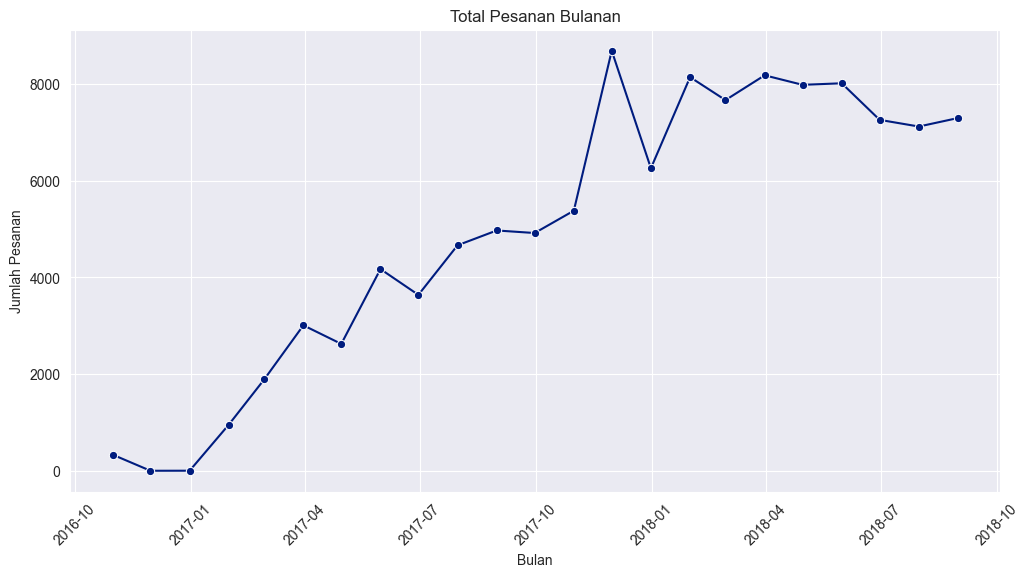

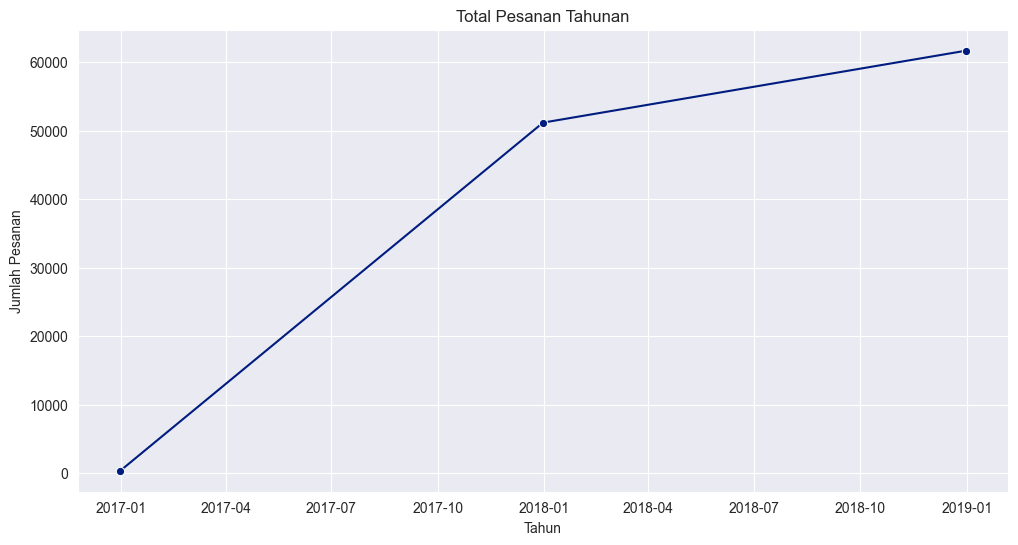

In [79]:
# Atur style menjadi 'darkgrid'
sns.set_style("darkgrid")

# Set palet warna menjadi 'muted'
sns.set_palette("dark")

# Mengonversi indeks menjadi DatetimeIndex
daily_orders.index = pd.to_datetime(daily_orders.index)

# Plot total pesanan bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_orders, marker='o', linestyle='-')
plt.title('Total Pesanan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.show()

# Plot total pesanan tahunan
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_orders, marker='o', linestyle='-')
plt.title('Total Pesanan Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pesanan')
plt.show()

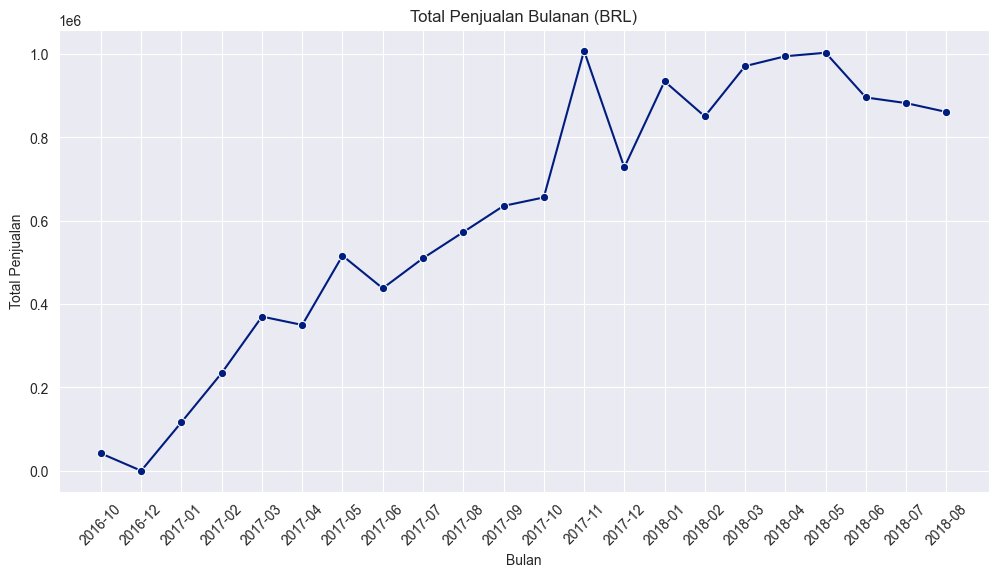

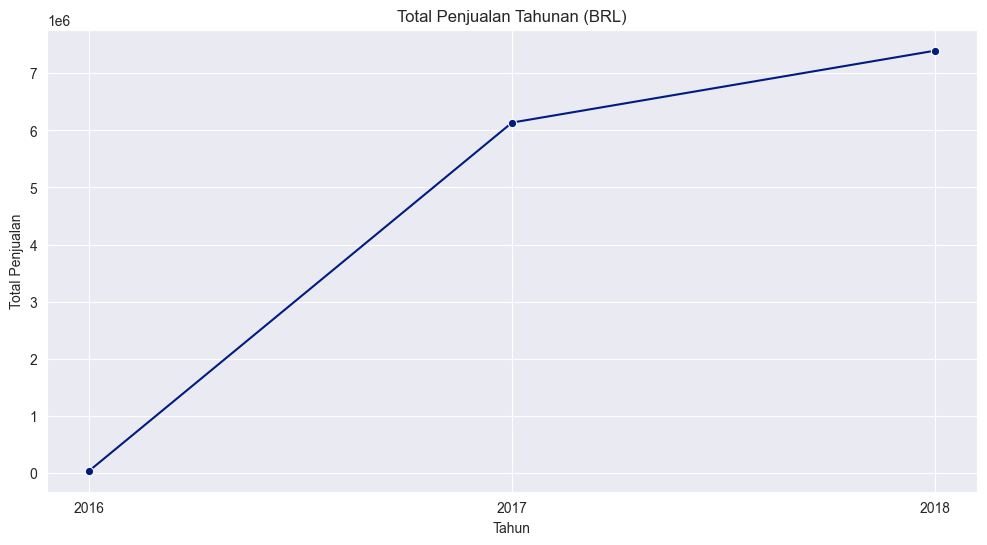

In [78]:
# Plot penjualan bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o', linestyle='-')
plt.title('Total Penjualan Bulanan (BRL)')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot penjualan tahunan
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_sales.index.astype(str), y=yearly_sales.values, marker='o', linestyle='-')
plt.title('Total Penjualan Tahunan (BRL)')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.show()

### **Q2. Kategori produk mana yang memiliki penjualan terbanyak?**

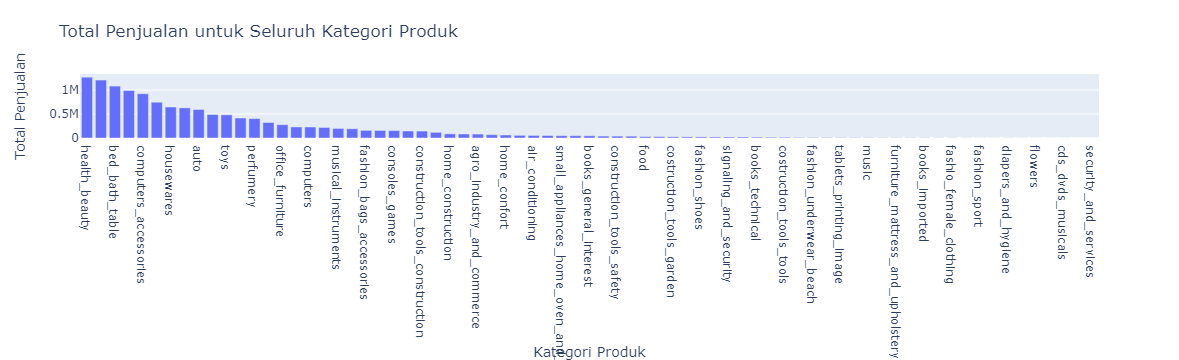

In [62]:
# Membuat DataFrame untuk total penjualan semua kategori
category_sales_df = category_sales_sorted.reset_index()
category_sales_df.columns = ['product_category_name', 'total_sales']

# Plot bar total penjualan untuk semua kategori
fig = px.bar(category_sales_df, x='product_category_name', y='total_sales', 
             title='Total Penjualan untuk Seluruh Kategori Produk',
             labels={'product_category_name': 'Kategori Produk', 'total_sales': 'Total Penjualan'})
fig.show()

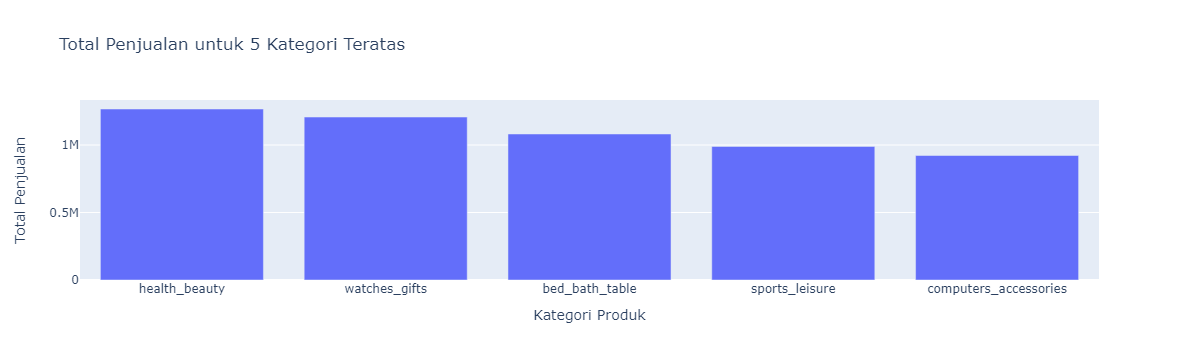

In [63]:
# Memilih hanya 5 kategori teratas
top_5_categories_df = category_sales_df.head(5)

# Plot bar total penjualan untuk 5 kategori teratas
fig = px.bar(top_5_categories_df, x='product_category_name', y='total_sales', 
             title='Total Penjualan untuk 5 Kategori Teratas',
             labels={'product_category_name': 'Kategori Produk', 'total_sales': 'Total Penjualan'})
fig.show()

## **Conclusion**

1. Seiring berjalannya waktu, total penjualan dan total pesanan terus meningkat dari tahun 2016 hingga 2018 dengan puncak penjualan pada bulan November tahun 2017 sebesar 1008005.90 BRL (sekitar 1 juta BRL).
2. 5 Kategori teratas produk dengan penjualan terbesar adalah `health_beauty`, `watches_gifts`, `bed_bath_table`, `sports_leisure`, dan `computer_accessories`. Total penjualan terbesar adalah kategori `health_beauty` yaitu sebesar 1267072.48 BRL (1.267 juta BRL).